In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as py
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [224]:
from google.colab import drive
#drive.mount('/content/drive')

# Analise dos Dados do Enem 2019

In [225]:
#dados do enem 2019 de provas feitas em Minas Gerais
#https://drive.google.com/file/d/1uckzyjRBKPFEAp2ZN0EsV1nmHWolr93c/view?usp=sharing
enem = pd.read_csv('mg.csv',';')

In [226]:
#tamanho total dos dados crus
enem.shape

(538896, 11)

In [227]:
#Nota total igual Ciencias da Natureza, ciencias humanas, matematica, linguagem e codigos, redação / 5
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
enem[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,512.6,564.6,626.4,533.4,860.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,621.0,654.4,726.8,595.8,800.0


In [228]:
#limpando os dados tirando todos que tiraram 0 em alguma materia e todos os treineiros
enem = enem.query('NU_NOTA_CN > 0')
enem = enem.query('NU_NOTA_CH > 0')
enem = enem.query('NU_NOTA_MT > 0')
enem = enem.query('NU_NOTA_LC > 0')
enem = enem.query('NU_NOTA_REDACAO > 0')
enem = enem.query('IN_TREINEIRO == 0')
enem.shape

(325462, 11)

In [229]:
enem.describe()

,NU_IDADE,TP_COR_RACA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,325462.000000,325462.000000,325462.0,325462.000000,325462.000000,325462.000000,325462.000000,325462.000000
mean,21.913357,2.073738,0.0,493.016170,525.455203,534.385909,546.703559,618.385249
std,7.105015,1.002670,0.0,78.068473,80.489613,58.210963,115.678380,167.790178
min,6.000000,0.000000,0.0,327.900000,315.900000,322.300000,359.000000,40.000000
25%,18.000000,1.000000,0.0,431.100000,468.100000,500.700000,451.000000,520.000000
50%,19.000000,2.000000,0.0,489.200000,530.400000,538.400000,530.100000,600.000000
75%,23.000000,3.000000,0.0,551.000000,582.900000,574.400000,629.600000,720.000000
max,83.000000,5.000000,0.0,842.800000,835.100000,770.500000,985.500000,1000.000000


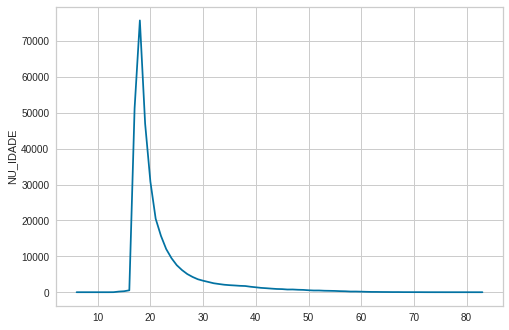

In [230]:
#Gráfico de idade 
temp = enem['NU_IDADE'].value_counts().sort_index()
sns.lineplot(data=temp)

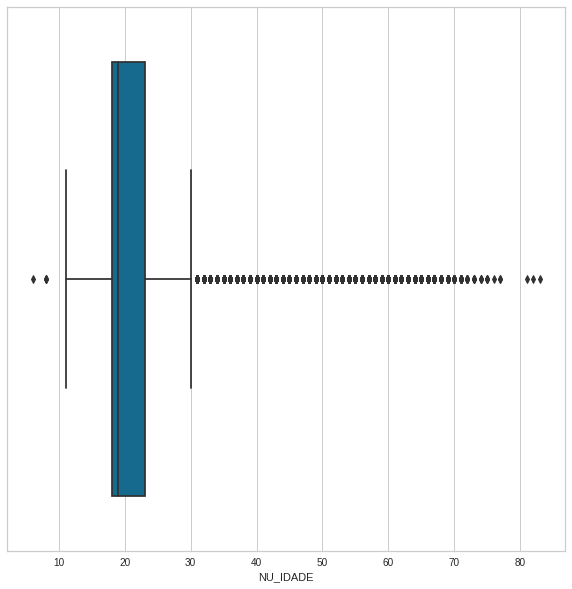

In [231]:
#Boxplot de idade
plt.figure(figsize=(10,10))
sns.boxplot(x='NU_IDADE', data= enem)

In [232]:
#Total de idade em ordem de recorrencia 
enem['NU_IDADE'].value_counts()

18    75729
17    51221
19    46954
20    30784
21    20476
      ...  
83        1
82        1
76        1
81        1
6         1
Name: NU_IDADE, Length: 72, dtype: int64

In [233]:
#criação da coluna nota total
enem['NU_NOTA_TOTAL'] = enem[notas].sum(axis=1)/5
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']
enem[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,512.6,564.6,626.4,533.4,860.0,619.40
4,621.0,654.4,726.8,595.8,800.0,679.60
6,469.8,575.4,412.3,525.8,600.0,516.66
7,353.0,507.3,610.6,536.2,740.0,549.42
9,505.2,566.5,579.2,572.5,560.0,556.68


Text(0, 0.5, 'Nota Total')

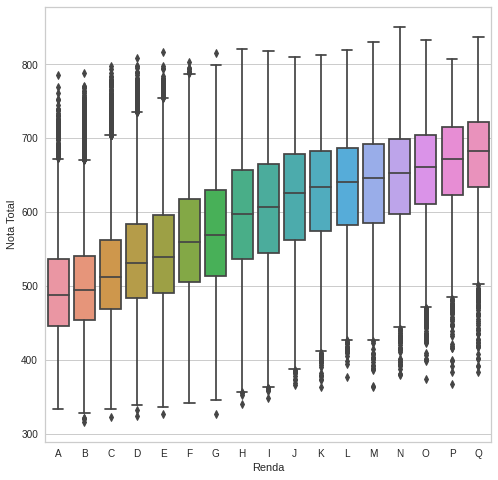

In [234]:
rendaOrdenada = enem['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(8,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= enem, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')

(0.0, 1000.0)

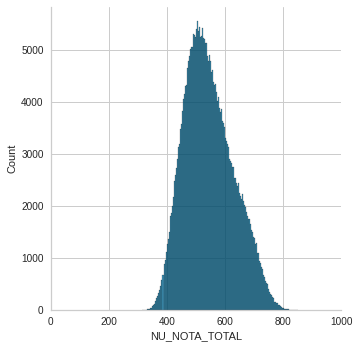

In [235]:
sns.displot(enem["NU_NOTA_TOTAL"])
plt.xlim(0,1000)

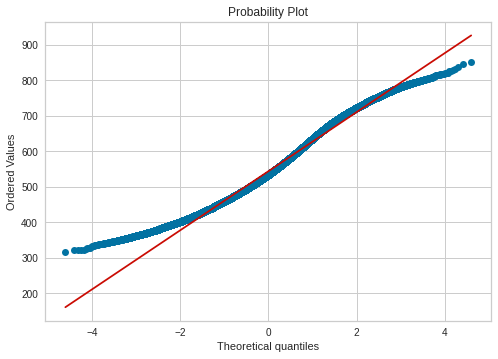

In [236]:
#conferindo a normalidade da nota total 
fig, ax = plt.subplots()
stats.probplot(enem['NU_NOTA_TOTAL'], fit=True,   plot=ax)
plt.show()

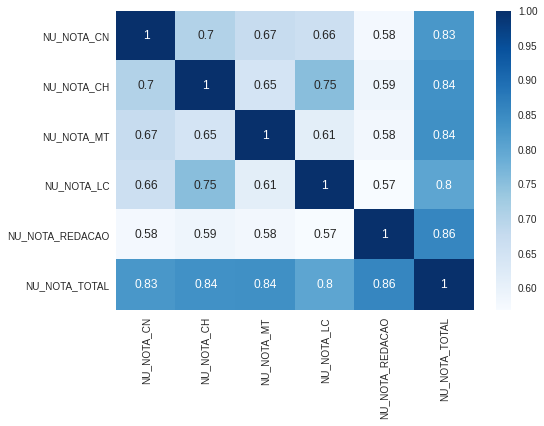

In [237]:
#correlção das notas por materia 
correlacao = enem[notas].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )

In [238]:
#ordenação de registros por cidade
#Tem registro de todas as cidades de MG
enem['NO_MUNICIPIO_RESIDENCIA'].value_counts()

Belo Horizonte      48144
Uberlândia          12581
Contagem            11268
Montes Claros       11088
Juiz de Fora        10033
                    ...  
Doresópolis            16
Comendador Gomes       16
Claraval               14
Serra da Saudade        7
Água Comprida           7
Name: NO_MUNICIPIO_RESIDENCIA, Length: 853, dtype: int64

In [239]:
notaTotal = enem
notaTotal = notaTotal.drop(['NU_IDADE'], axis=1)
notaTotal = notaTotal.drop(['TP_SEXO'], axis=1)
notaTotal = notaTotal.drop(['TP_COR_RACA'], axis=1)
notaTotal = notaTotal.drop(['IN_TREINEIRO'], axis=1)
notaTotal = notaTotal.drop(['Q006'], axis=1)
notaTotal[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']] = notaTotal[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']].apply(pd.to_numeric)
notaTotal

,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,Uberlândia,512.6,564.6,533.4,626.4,860.0,619.40
4,São João da Ponte,621.0,654.4,595.8,726.8,800.0,679.60
6,Três Corações,469.8,575.4,525.8,412.3,600.0,516.66
7,Betim,353.0,507.3,536.2,610.6,740.0,549.42
9,Três Corações,505.2,566.5,572.5,579.2,560.0,556.68
...,...,...,...,...,...,...,...
538890,Ibirité,363.4,527.8,547.0,516.9,740.0,539.02
538891,Uberaba,453.6,446.2,446.9,467.9,260.0,414.92
538892,São João do Paraíso,527.6,534.4,543.3,537.9,600.0,548.64
538893,Capinópolis,473.7,380.7,499.6,369.3,560.0,456.66


In [240]:
notaTotal = notaTotal.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()
notaTotal

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NO_MUNICIPIO_RESIDENCIA,,,,,,
Abadia dos Dourados,479.656471,515.357647,519.867059,517.181176,641.882353,534.788941
Abaeté,497.430000,523.403226,533.764194,558.362903,623.419355,547.275935
Abre Campo,477.200000,511.754651,525.492442,555.522093,598.720930,533.738023
Acaiaca,452.878723,492.970213,506.112766,478.734043,514.042553,488.947660
Aguanil,473.150000,511.328000,514.112000,555.744000,586.000000,528.066800
...,...,...,...,...,...,...
Wenceslau Braz,497.261111,546.172222,534.616667,558.225000,642.222222,555.699444
Água Boa,483.762500,512.082813,510.157813,550.082813,602.500000,531.717187
Água Comprida,493.671429,509.628571,526.857143,547.900000,577.142857,531.040000


# IFDM MG

In [241]:
#dados do IFDM 2016 de Minas Gerais
ifdm = pd.read_csv('IFDM2016.csv',';')
ifdm.dropna
ifdm.shape

(853, 6)

In [242]:
#A escala de IFDM vai de 0 a 1, multipliquei por 1000 para conseguir manipular mais facilmente 
ifdm['IFDM'] = ifdm['IFDM'].astype(float)
ifdm['IFDM'] = ifdm['IFDM']*1000
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda'].astype(float)
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda']*1000
ifdm['Educação'] = ifdm['Educação'].astype(float)
ifdm['Educação'] = ifdm['Educação']*1000
ifdm['Saúde'] = ifdm['Saúde'].astype(float)
ifdm['Saúde'] = ifdm['Saúde']*1000

In [243]:
ifdm.describe()

,Ranking Educação,IFDM,Emprego & Renda,Educação,Saúde
count,853.000000,842.000000,842.000000,853.000000,853.000000
mean,427.000000,677.761164,447.089311,813.414068,772.605979
std,246.384185,67.543406,110.401436,52.915089,109.147216
min,1.000000,456.800000,190.600000,602.500000,356.900000
25%,214.000000,634.525000,364.325000,778.100000,707.300000
50%,427.000000,678.100000,442.200000,816.000000,793.500000
75%,640.000000,721.725000,515.275000,852.400000,853.500000
max,853.000000,858.600000,795.500000,979.900000,972.300000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

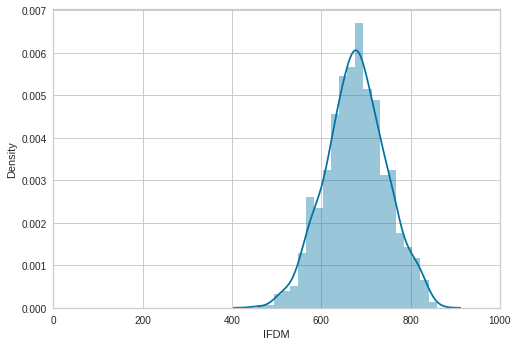

In [244]:
#Gráfico de recorrencia de IFDM
sns.distplot(ifdm['IFDM'])
plt.xlim(0,1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

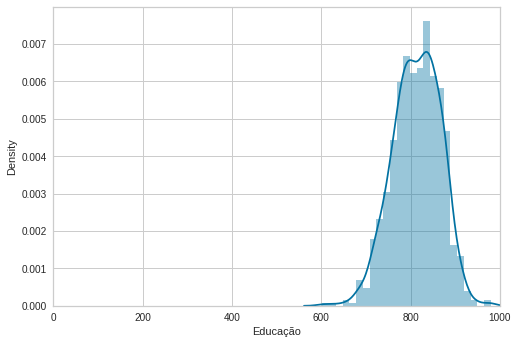

In [245]:
#Gráfico de recorrencia de IFDM de Educação
sns.distplot(ifdm['Educação'])
plt.xlim(0,1000)

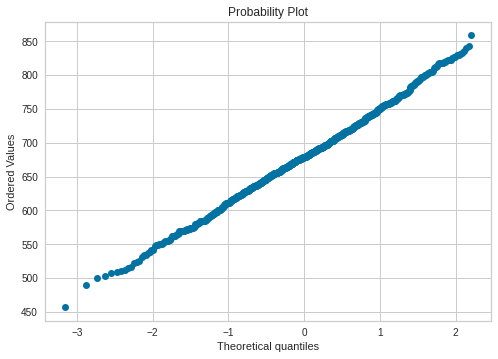

In [246]:
#conferindo a normalidade do IFDM geral
fig, ax = plt.subplots()
stats.probplot(ifdm['IFDM'], fit=True,   plot=ax)
plt.show()

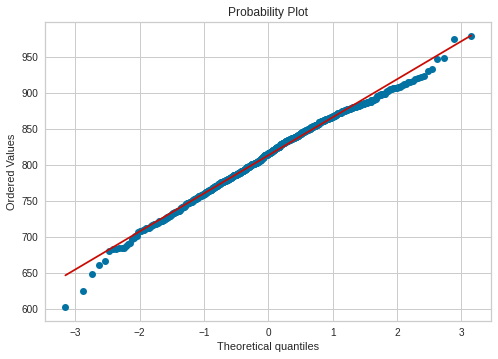

In [247]:
#conferindo a normalidade do IFDM Educação
fig, ax = plt.subplots()
stats.probplot(ifdm['Educação'], fit=True,   plot=ax)
plt.show()

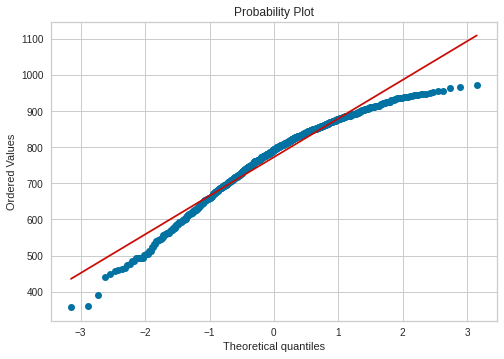

In [248]:
#conferindo a normalidade do IFDM Saúde
fig, ax = plt.subplots()
stats.probplot(ifdm['Saúde'], fit=True,   plot=ax)
plt.show()

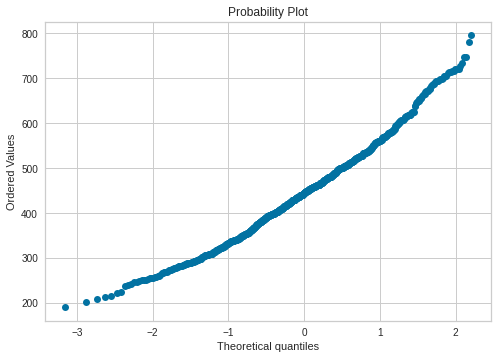

In [249]:
#conferindo a normalidade do IFDM Emprego e Renda
fig, ax = plt.subplots()
stats.probplot(ifdm['Emprego & Renda'], fit=True,   plot=ax)
plt.show()

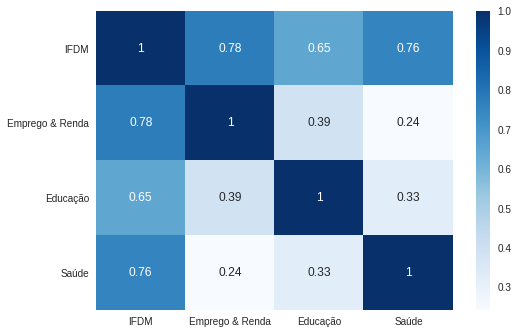

In [250]:
#Mapa de calor da correlação das catergorias do IFDM
criterios = ['IFDM','Emprego & Renda',	'Educação',	'Saúde']
correlacao = ifdm[criterios].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )

# IDEB 2019

In [251]:
ideb = pd.read_excel('IDEB2019.xlsx')
ideb['Total'] = ideb['Total']*10
ideb

,Nome do Município,Total,Indicador de Rendimento (P)
0,Abadia dos Dourados,901.0,0.911927
1,Abaeté,718.0,0.724026
2,Abre Campo,859.0,0.873401
3,Acaiaca,840.0,0.832811
4,Açucena,898.0,0.900216
...,...,...,...
847,Virginópolis,696.0,0.699141
848,Virgolândia,954.0,0.955305
849,Visconde do Rio Branco,735.0,0.735865
850,Volta Grande,819.0,0.825635


In [252]:
ideb.describe()

,Total,Indicador de Rendimento (P)
count,852.000000,852.000000
mean,855.003521,0.857546
std,75.347319,0.074218
min,534.000000,0.524296
25%,814.000000,0.818601
50%,864.000000,0.866306
75%,909.250000,0.908687
max,1000.000000,1.000000


In [253]:
ideb.corr()


,Total,Indicador de Rendimento (P)
Total,1.000000,0.981411
Indicador de Rendimento (P),0.981411,1.000000


In [254]:
#retirando o indicador de rendimento por ser severamente proximo do indicador total
ideb = ideb.drop(['Indicador de Rendimento (P)'], axis = 1)

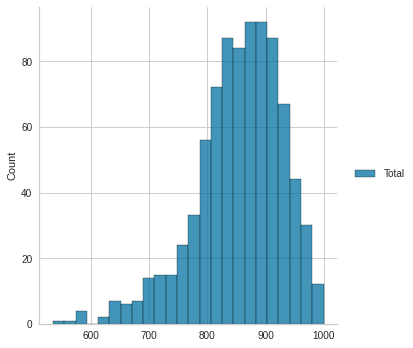

In [255]:
sns.displot(ideb)

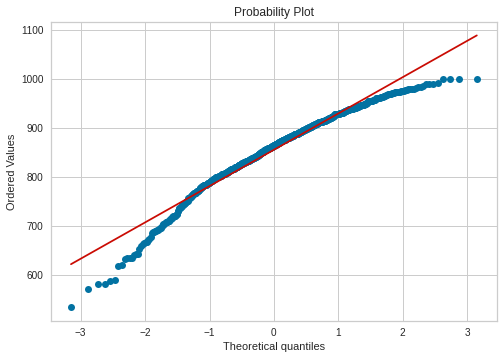

In [256]:
fig, ax = plt.subplots()
stats.probplot(ideb['Total'], fit=True,   plot=ax)
plt.show()

# Correlação

In [257]:
cor = pd.read_excel('compilado.xlsx')
cor = cor.set_index('Nome do Município')
cor.dtypes

Enem        float64
Geral       float64
Renda       float64
Educacao    float64
Saude       float64
IDEB          int64
dtype: object

In [258]:
cor

,Enem,Geral,Renda,Educacao,Saude,IDEB
Nome do Município,,,,,,
Abadia dos Dourados,534.788941,708.8,499.3,836.0,791.1,901
Abaeté,547.275935,655.2,491.3,846.1,628.2,718
Abre Campo,533.738023,641.4,436.7,792.2,695.3,859
Acaiaca,488.947660,681.1,345.7,831.3,866.2,840
Açucena,515.603944,674.4,407.2,712.1,903.8,898
...,...,...,...,...,...,...
Virginópolis,548.276106,617.6,376.8,794.8,681.4,696
Virgolândia,509.596923,681.3,337.1,780.2,926.4,954
Visconde do Rio Branco,558.753975,741.0,608.4,854.5,760.1,735


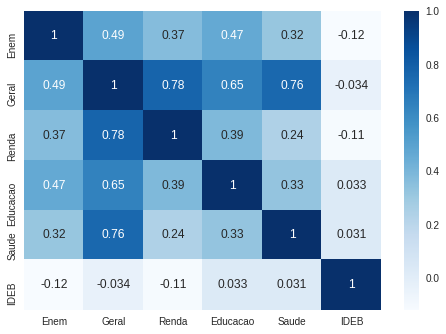

In [259]:
sns.heatmap(cor.corr(), cmap="Blues", annot=True )

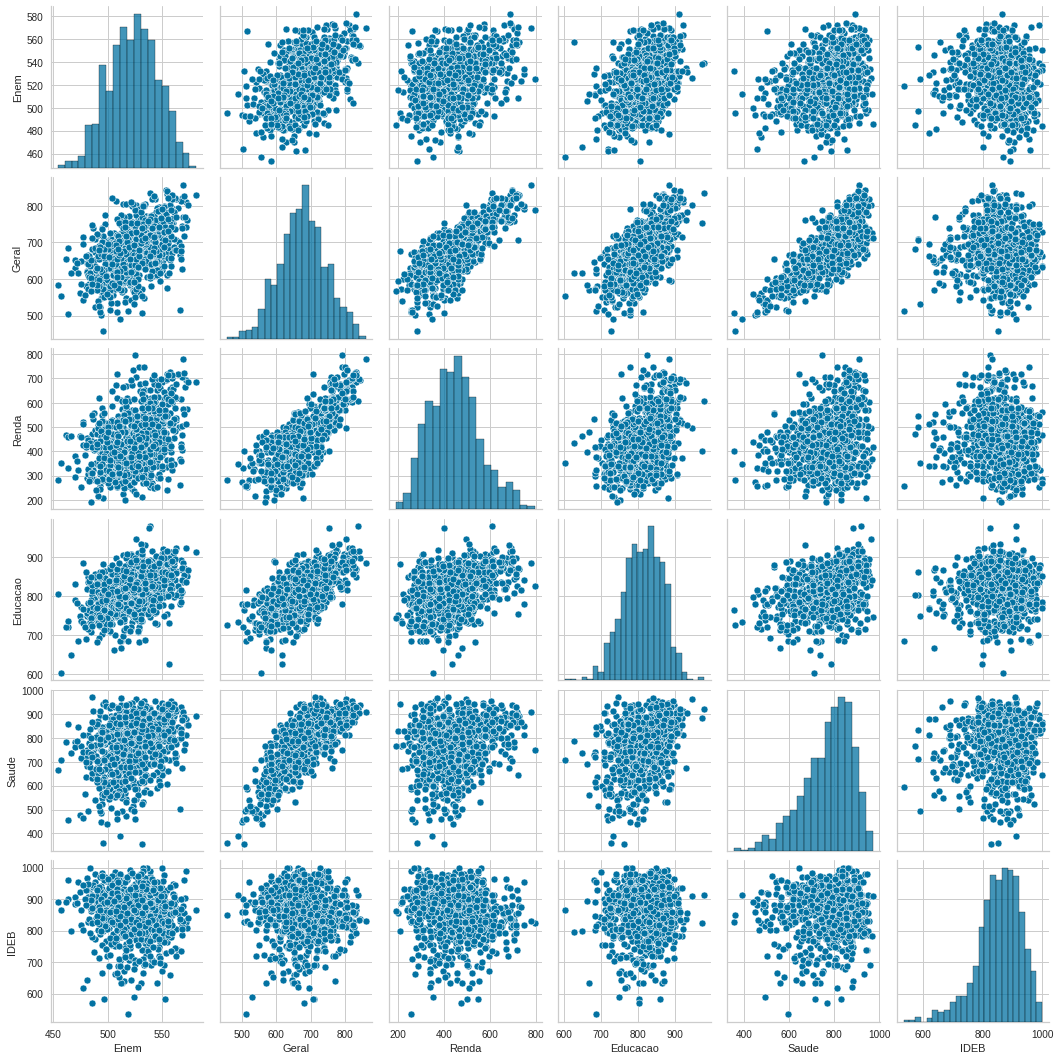

In [260]:
sns.pairplot(cor)

# Regressão Linear 1

In [265]:
x = cor.iloc[:, 3].values
x = x.reshape(-1, 1)
y = cor.iloc[:, 0].values
modelo = LinearRegression()
modelo.fit(x,y)
modelo.score(x,y)

0.21694850145729616

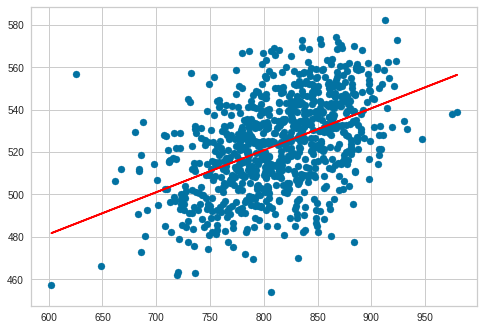

In [268]:
previsoes = modelo.predict(x)
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')

In [266]:
# modedelo 2 
modeloAjustado = sm.ols(formula= 'Enem ~ Geral + Renda + Educacao + Saude + IDEB', data = cor)
modeloTreinado = modeloAjustado.fit()
modeloTreinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Enem   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     69.68
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           6.16e-61
Time:                        06:15:45   Log-Likelihood:                -3660.2
No. Observations:                 841   AIC:                             7332.
Df Residuals:                     835   BIC:                             7361.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.2849     12.413     31.521      0.000     366.920     415.650
Geral         -3.2040     19.926     -0.161      0.872     -42.314      35.906
Renda          1.1047      6.641      0.166      0.868     -11.931      14.141
Educacao       1.2144      6.642      0.183      0.855     -11.823      14.251
Saude          1.1022      6.642      0.166      0.868     -11.935      14.139
IDEB          -0.0347      0.009     -3.939      0.000      -0.052      -0.017
==============================================================================
Omnibus:                        1.538   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.423
Skew:                          -0.096   Prob(JB):                        0.491
Kurtosis:                       3.061   Cond. No.                     5.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""